In Poland, at the end of their high school period, everyone takes so called "Matura" exam. Or actually "Matura" exams, because it consits of couple exams, each from different subject. Students are obligated to take advanced exam from at least one subject, but there are also couple basic exams taken by everyone. Math is one of that exam, and tasks for each exam are based on the official requirements written by the authority responsible for the examination - CKE. However, the requirements often change mostly due to politics and changes by the government. The earliest changes were done in the 2015, which are now reffered to as the "old" requirements, and in 2023, which became the "new" requirements. Some significant changes were also made for 2020 and 2021, because of the COVID-19 pandemy and the several problems in the education system it has caused. 

There is a common conviction that nowdays math exams are significantly easier than in the past, which would be a really hard thing to prove, because the difficulty of the exam is too subjective. However, there are some interesting things that we can look at and perhaps maybe compare between exams at different times and based on different requirements!

There can be found an answer sheet to every exam (at least since the year 2015), in which one can found information about:
* Chapter(s) and topic(s) from the requirements based on which the task was written,
* Number of points that one could be awarded by solving the task.
Also, in the other files one can found:
* List of requirements for both 2015 and 2023 period,
* Percentage of completion the tasks by the students (for example, if it is equal to 74%, it means that on average every student completed that task in 74%).

The following analysis will focus on comparing math exams based on the same requirements (from 2015 or 2023), comparing the exams based on requirements from 2015 with those based on requirements from 2023, and on comparing the requirements themselfs. Before the analysis, few important things should be noted:

* Because of the change in the requirements for the years 2021 and 2022, **the exams based on the requirements from 2015 are limited to years 2015-2020**,
* The time the analysis was made, there were only 2 main exams based on the reqirements from 2023, thus **the analysis for the exams based on the requirements from 2023 were made also on two "additional" exams from 2023 and 2024, and one "make-up" exam from the year 2024**. This makes the sample as follows:
  - Matura "main" math exams from the years 2015, 2016, 2017, 2018, 2019, 2020, based on the requirements from 2015,
  - Matura "main" math exams from the years 2023, 2024, based on the requirements from 2023,
  - Matura "additional" math exams from the years 2023, 2024, based on the requirements from 2023,
  - Matura "make-up" exam from the year 2024, based on the requirements from 2023.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Creating two DataFrames for exams written based on core curriculum released in 2015 (old) and based on core curriculum released in 2023 (new).

In [2]:
req_2015 = pd.read_csv("req_2015.csv", index_col="id")
req_2023 = pd.read_csv("req_2023.csv", index_col="id")
old_exams = pd.read_csv("old_exams_data.csv", index_col="id")
new_exams = pd.read_csv("new_exams_data.csv", index_col="id")

In [3]:
for data in [req_2015, req_2023, old_exams, new_exams]:
    data["req_id"] = data["req_id"].astype(str)

for exam in [old_exams, new_exams]:
    exam["exam_type"] = ["main" if type == "primary" else type for type in exam["exam_type"].values]

"old" DataFrame contains topic and chapter ids in a separate columns, but it will be easier to do further comparisons with topic and chapter id written in one column in a form "*chapter_id*.*topic_id*". To achieve this form the function `fix_topic_id` was created, which simply connects content from `chapter_numb` and `topic_numb` with a dot in between, and save the result in a column `topic_id`. "new" DataFrame has already column in a desired way, but named `chapter_topic`, thus it was renamed to match the column in "old" DataFrame.

Digging a little bit deeper into the answer sheets result in a interesting thing. While exams from 2023 and 2024 are based only on the requirements from high school, exams from 2015-2020 period are based on the requirements from high school, middle school, and even primary school. It seems like tere is a little bit different distribution in the requirements list. Requirements from 2023 are written in a way that every requirement, based on which the task on matura can be written, is listed as a high school requirements, even though it could be listed in the middle or primary school requirements as well. However, high school requirements from 2015 doesn't include the requirements from middle and primary school, and if some task on matura is based on such requirement, it is pointed out that this is a requirement from middle or primary school. Thus, to compare the number of the requirements in both lists, the difference in the distribution in both lists should be covered first. Theoretically, task on matura from 2015-2020 period could be based on any of the 2015 requirements from middle or primary school, but that would be quite an overstatement, because there is no way that such a task would be mostly based on a requirement such as "student can count up to 100". It is obvious, that only few requirements should be valuable enough to base a matura task on, so only a few requirements should be tranfsered to the overall pool of the requirements based on which 2015-2020 matura's were written. The simplest way to find such requirements is to look at the answers sheet of all 2015-2020 matura's and find all of the middle and primary school requirements that showed up. 

To do just that, one should load the answer sheet data of matura's from 2015-2020 and find the requirements that are flagged as "middle school" and "primary school":

After DataFrame containing data from 2015-2020 is done, `add_topic` DataFrame is created from it by limiting rows to only those which has "middle" or "primary" in `topic_school_type` column, and dropping duplicates, to insure that the data contains one row per different requirement from middle or primary school that showed up on the matura exam. Before duplicates are dropped, the data is limited to columns `topic_school_type` and `topic_id` to insure that the only rows that left differs on either `topic_school_type` or `topic_id`.

Now, the requirements with above id's can be added to 2015 requirements as requirements from middle and primary school based on which tasks from 2015-2020 matura's could be written. The same process is not needed for 2023 requirements, because such requirements from middle and primary school are already copied to the high school requirements  

The next thing to do is to mark in the requirements data all of the requirements that at least once showed up on the exam. Thus, firstly the 2023-2024 exams data should be loaded and tranfsformed:

And now, the column is added:

In [4]:
req_2015["showed_up"] = None
req_2023["showed_up"] = None

prim_mid_indexes = req_2015[req_2015["school_type"].isin(["middle", "primary"])].index
high_indexes = req_2015[req_2015["school_type"] == "high"]
high_indexes = high_indexes[high_indexes["req_id"].isin(old_exams["req_id"].values)].index

req_2015.loc[prim_mid_indexes, "showed_up"] = True
req_2015.loc[high_indexes, "showed_up"] = True

high_2023_indexes = req_2023[req_2023["req_id"].isin(new_exams["req_id"].values)].index
req_2023.loc[high_2023_indexes, "showed_up"] = True

The first thing to do is obviously compare the sizes of the requirements

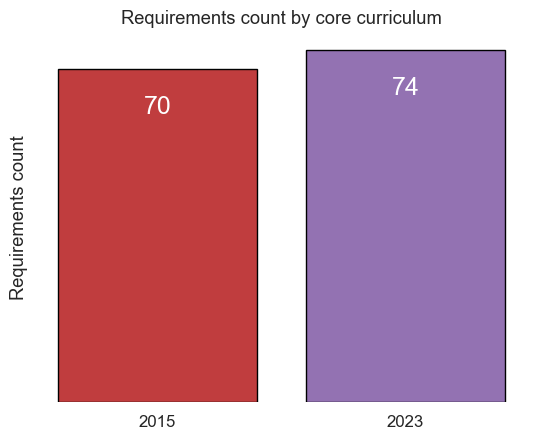

In [5]:
req = pd.concat([req_2015, req_2023], ignore_index=True)

sns.set_style("white")
sns.set_context("notebook", font_scale=1.1)
req_palette = {
    2015: "tab:red",
    2023: "tab:purple"
}

ax_count = sns.countplot(data=req, x="req_year", hue="req_year", palette=req_palette, legend=False, edgecolor="black")
for p in ax_count.patches:
    ax_count.annotate(f'\n{int(p.get_height())}', (p.get_x() + 0.4, p.get_height()), ha='center', va='top', color='white', size=18)

ax_count.set(xlabel="",
       ylabel="Requirements count",
      title="Requirements count by core curriculum",
      yticks=[])


sns.despine(bottom = True, left=True)


plt.show()

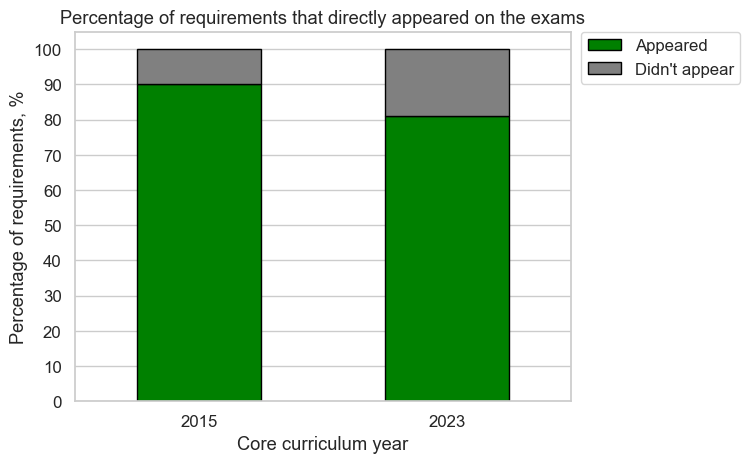

In [6]:
sns.set_style("whitegrid")

req_perc = pd.DataFrame({
    "req_year": ["2015", "2023"],
    "appeared": [round(core_curriculum["showed_up"].sum() / core_curriculum.index.size, 2) * 100 for core_curriculum in [req_2015, req_2023]],
    "not_appeared": [round(1 - core_curriculum["showed_up"].sum() / core_curriculum.index.size, 2) * 100 for core_curriculum in [req_2015, req_2023]]
})

ax_req_app = req_perc.set_index("req_year").plot(kind="bar", stacked=True, legend=False, edgecolor="black", color=["green", "grey"])

ax_req_app.set_xlabel("Core curriculum year")
ax_req_app.set_title("Percentage of requirements that directly appeared on the exams")
ax_req_app.set_ylabel("Percentage of requirements, %")

ax_req_app.set_yticks(range(0, 110, 10))
ax_req_app.grid(axis = "x")

labels_legend = ["Appeared", "Didn't appear"]
ax_req_app.legend(labels=labels_legend, bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.xticks(rotation=0)

req_perc.to_csv("Data/perc_req_appeared.csv")

plt.show()

Quick note, that some of the requirements are not that valiable to base entire task on, instead they appear a bit "non directly". For example, raising a number to some power can appear in a planimetry task, but the exam won't be flagged as based on the requirement "student can raise a number to some power". However, it is still interesting that in only 2 years requirements from 2023 already appeared in almost the same percentage as requirements from 2015. Yes, the number of exams were almost the same (6 for requirements from 2015 and 5 for requirements from 2023), but the expectation was that the appearing requirements won't change that much in the same year between main, additional, and make-up exams. Yet, they changed enough that the overall percentage of the appearing requirements is almost the same as in 2015.

In [7]:
def get_2015_avg(n):
    return round((np.sum(n) / 6), 2)

def get_2023_avg(n):
    return round((np.sum(n) / 5), 2)

exams = pd.concat([old_exams, new_exams], ignore_index=True)

avg_2015 = pd.DataFrame(columns=["pt_sum"])
avg_2023 = pd.DataFrame(columns=["pt_sum"])

avg_2015["pt_sum"] = exams[exams["req_year"] == 2015].groupby(["req_year", "school_type", "req_id"])["points"].agg(get_2015_avg)
avg_2023["pt_sum"] = exams[exams["req_year"] == 2023].groupby(["req_year", "school_type", "req_id"])["points"].agg(get_2023_avg)

avg_perc_2015 = pd.DataFrame(columns=["avg_perc"])
avg_perc_2023 = pd.DataFrame(columns=["avg_perc"])

avg_perc_2015["avg_perc"] = (avg_2015["pt_sum"] / 50) * 100
avg_perc_2023["avg_perc"] = (avg_2023["pt_sum"] / 46) * 100

avg_perc = pd.concat([avg_perc_2015, avg_perc_2023])

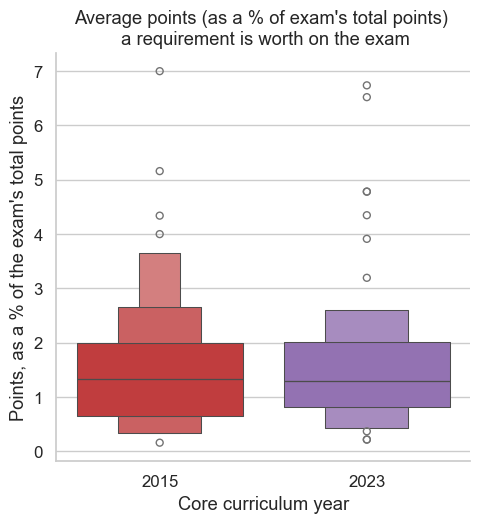

In [8]:
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.1)
palette = {
    2015: "tab:red",
    2023: "tab:purple"
}

g = sns.catplot(data=avg_perc, x="req_year", y="avg_perc", kind="boxen", hue="req_year", palette=palette, legend=False)
g.set(xlabel="Core curriculum year", ylabel="Points, as a % of the exam's total points")
g.set(title="Average points (as a % of exam's total points) \n a requirement is worth on the exam")
g.set(yticks=range(0, 8, 1))

avg_perc.to_csv("Data/average_points_worth.csv")

plt.show()

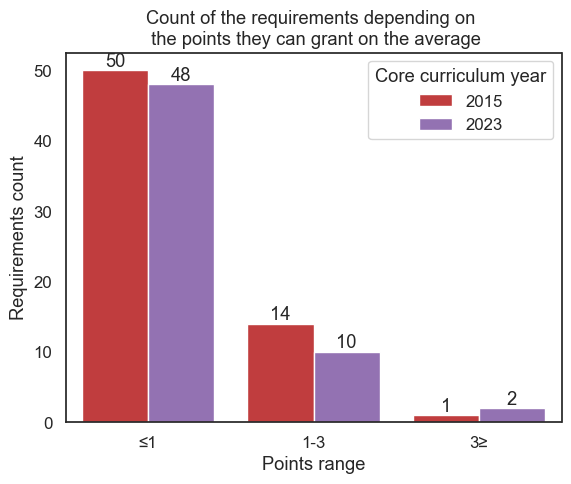

In [9]:
avg_pts = pd.concat([avg_2015, avg_2023])

cat = []

for pts in avg_pts.reset_index()["pt_sum"].values:
    if pts <= 1:
        cat.append("≤1")
    elif 1 < pts < 3:
        cat.append("1-3")
    else:
        cat.append("3≥")

avg_pts["cat"] = pd.Categorical(cat, categories=["≤1", "1-3", "3≥"], ordered=True)

palette = {
    2015: "tab:red",
    2023: "tab:purple"
}

sns.set_style("white")
sns.set_context("notebook", font_scale=1.1)

g = sns.countplot(data=avg_pts, x="cat", hue="req_year", palette=palette)
g.set(xlabel="Points range", ylabel="Requirements count")
for i in g.containers:
    g.bar_label(i,)
    
g.set(title="Count of the requirements depending on \n the points they can grant on the average")
plt.legend(title="Core curriculum year")

plt.show()

In [10]:
def get_perc_2015(n):
    return round(((np.sum(n) / 50) * 100), 2)

def get_perc_2023(n):
    return round(((np.sum(n) / 46) * 100), 2)

old_exams["req_year-type"] = old_exams["exam_type"] + " based " + old_exams["req_year"].astype(str)
new_exams["req_year-type"] = new_exams["exam_type"] + " based " + new_exams["req_year"].astype(str)

top_10_2015 = avg_2015[avg_2015["pt_sum"] >= 1]
top_10_2023 = avg_2023[avg_2023["pt_sum"] >= 1]

exams_grouped_2015 = pd.DataFrame(columns=["top_points"])
exams_grouped_2023 = pd.DataFrame(columns=["top_points"])

exams_grouped_2015["top_points"] = old_exams[old_exams["req_id"].isin(top_10_2015.index.get_level_values(2))].groupby(["req_year-type", "exam_year"])["points"].agg(get_perc_2015)
exams_grouped_2023["top_points"] = new_exams[new_exams["req_id"].isin(top_10_2023.index.get_level_values(2))].groupby(["req_year-type", "exam_year"])["points"].agg(get_perc_2023)

In [11]:
exams_grouped = pd.concat([exams_grouped_2015, exams_grouped_2023])

In [12]:
year_cat = pd.DataFrame({
    "exam_year": [2015, 2016, 2017, 2018, 2019, 2020, 2023, 2023, 2024, 2024, 2024],
    "req_year-type": [
        "main based 2015",
        "main based 2015",
        "main based 2015",
        "main based 2015",
        "main based 2015",
        "main based 2015",
        "main based 2023",
        "additional based 2023",
        "main based 2023",
        "additional based 2023",
        "make-up based 2023"
    ],
    "exam":[
        "main 2015",
        "main 2016",
        "main 2017",
        "main 2018",
        "main 2019",
        "main 2020",
        "main 2023",
        "additional 2023",
        "main 2024",
        "additional 2024",
        "make-up 2024"
    ]
})

exams_top_max = exams_grouped.reset_index().merge(year_cat, on=["exam_year", "req_year-type"], how="left")
exams_top_max[["school_type", "req_year"]] = exams_top_max["req_year-type"].str.split(" based ", n=1, expand=True)

In [13]:
perc_2015 = pd.concat(pd.read_csv(f"perc_{year}.csv", index_col="id") for year in range(2015, 2021))
perc_2015.reset_index(drop=True, inplace=True)
perc_2015.index.rename("id", inplace=True)

perc_2023 = pd.concat(pd.read_csv(f"perc_{year}.csv", index_col="id") for year in [2023, 2024])
perc_2023.reset_index(drop=True, inplace=True)
perc_2023.index.rename("id", inplace=True)

perc_2023["req_id"] = perc_2023["req_id"].astype(str)

st = []
for req in perc_2015["req_id"].values:
    if "SP" in req:
        st.append("primary")
    elif "G" in req:
        st.append("middle")
    else:
        st.append("high")

perc_2015["school_type"] = st
perc_2015["req_id"] = perc_2015["req_id"].str.replace("G", "").str.replace("SP", "")
perc_2023["school_type"] = "high"

perc_2015["perc"] = perc_2015["perc"] / 100
perc_2015["req_year"] = 2015
perc_2023["perc"] = perc_2023["perc"] / 100
perc_2023["req_year"] = 2023

perc_2015_gp = pd.DataFrame(columns=["avg_perc"])
perc_2015_gp["avg_perc"] = perc_2015.groupby(["req_year", "school_type", "req_id"])["perc"].mean()

perc_2023_gp = pd.DataFrame(columns=["avg_perc"])
perc_2023_gp["avg_perc"] = perc_2023.groupby(["req_year", "school_type", "req_id"])["perc"].mean()

old_perc = top_10_2015.merge(perc_2015_gp, on=["school_type", "req_id"], how="left")
new_perc = top_10_2023.merge(perc_2023_gp, on=["school_type", "req_id"], how="left")

old_perc["exp_pts"] = old_perc["pt_sum"] * old_perc["avg_perc"]
new_perc["exp_pts"] = new_perc["pt_sum"] * new_perc["avg_perc"]

In [14]:
points_top_2015 = old_exams[old_exams["req_id"].isin(top_10_2015.index.get_level_values(2))]
points_top_2023 = new_exams[new_exams["req_id"].isin(top_10_2023.index.get_level_values(2))]

perc_merge_2015 = points_top_2015.merge(perc_2015_gp, on=["school_type", "req_id"], how="left")
perc_merge_2015["exp_points"] = perc_merge_2015["points"] * perc_merge_2015["avg_perc"]

perc_merge_2023 = points_top_2023.merge(perc_2023_gp, on=["school_type", "req_id"], how="left")
perc_merge_2023["exp_points"] = perc_merge_2023["points"] * perc_merge_2023["avg_perc"]

In [15]:
perc_2015 = perc_merge_2015.groupby(["req_year-type", "exam_year"])["exp_points"].agg(get_perc_2015)
perc_2023 = perc_merge_2023.groupby(["req_year-type", "exam_year"])["exp_points"].agg(get_perc_2023)
all_perc = pd.concat([perc_2015, perc_2023])

perc_data = pd.DataFrame(columns=["exam_exp_perc"])
perc_data["exam_exp_perc"] = all_perc

In [16]:
exams_top_exp = perc_data.reset_index().merge(year_cat, on=["exam_year", "req_year-type"], how="left")
exams_top_exp[["school_type", "req_year"]] = exams_top_exp["req_year-type"].str.split(" based ", n=1, expand=True)

exams_top_exp.rename(columns={"exam_exp_perc": "top_points"}, inplace=True)

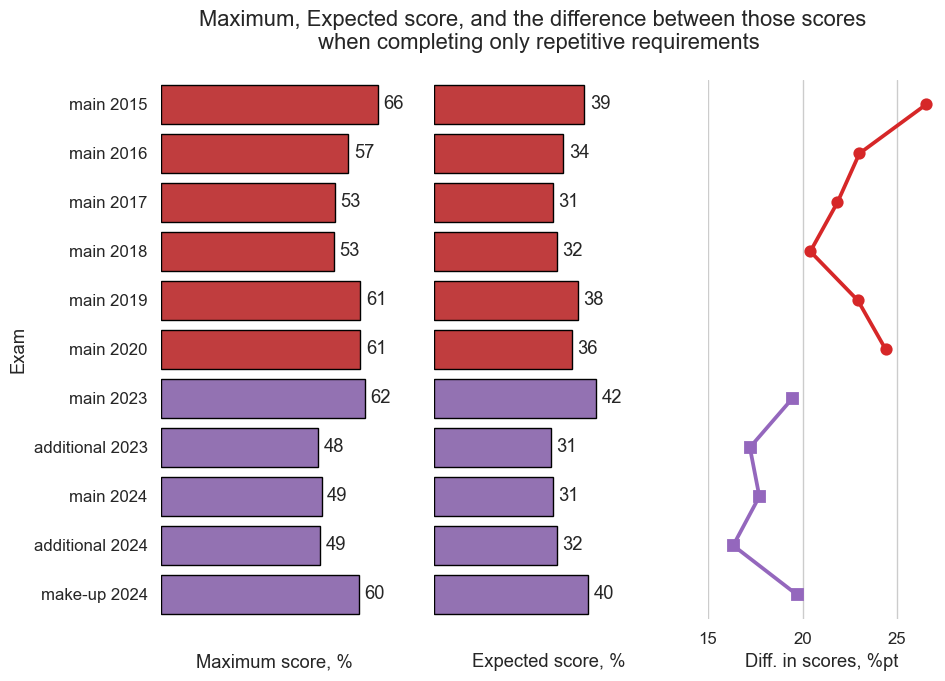

In [17]:
f, ax = plt.subplots(1, 3, sharex=False, sharey=True, figsize=(10,7), gridspec_kw={'width_ratios': [1, 1, 1]})

sns.set_style("white")

sns.set_context("notebook", font_scale=1.1)

palette={
    "2015": "tab:red",
    "2023": "tab:purple"
}


order = [
        "main 2015",
        "main 2016",
        "main 2017",
        "main 2018",
        "main 2019",
        "main 2020",
        "main 2023",
        "additional 2023",
        "main 2024",
        "additional 2024",
        "make-up 2024"
    ]

sns.barplot(data=exams_top_max, x="top_points", y="exam", hue="req_year", order=order, palette=palette, legend=False, edgecolor="black", ax=ax[0])
ax[0].set(xlabel="Maximum score, %", ylabel="Exam")
ax[0].set(xticks=range(0, 70, 10))
ax[0].set_xticklabels([])
ax[0].xaxis.labelpad = 15

for i in ax[0].containers:
    ax[0].bar_label(i, fmt="%.0f", padding=4)

sns.despine(left = True, bottom = True)

sns.barplot(data=exams_top_exp, x="top_points", y="exam", hue="req_year", order=order, palette=palette, legend=False, edgecolor="black", ax=ax[1])
ax[1].set(xlabel="Expected score, %", ylabel="")
ax[1].set(xticks=range(0, 70, 10))
ax[1].set_xticklabels([])
ax[1].xaxis.labelpad = 15

for i in ax[1].containers:
    ax[1].bar_label(i, fmt="%.0f", padding=4)

exams_max_exp_diff = exams_top_max.copy()
exams_max_exp_diff["top_points"] = exams_top_max["top_points"] - exams_top_exp["top_points"]

sns.pointplot(data=exams_max_exp_diff, x="top_points", y="exam", hue="req_year", palette=palette, markers=["o", "s"], ax=ax[2], legend=False)
ax[2].set(xlabel="Diff. in scores, %pt", ylabel="")
ax[2].grid(axis = "x")
ax[2].set(xticks=range(15, 30, 5))

sns.despine(left = True, bottom = True)
plt.tick_params(bottom = False) 
plt.suptitle("Maximum, Expected score, and the difference between those scores \n when completing only repetitive requirements")

exams_top_max.to_csv("Data/exams_top_max.csv")
exams_top_exp.to_csv("Data/exams_top_exp.csv")
exams_max_exp_diff.to_csv("Data/exams_diff.csv")

plt.show()

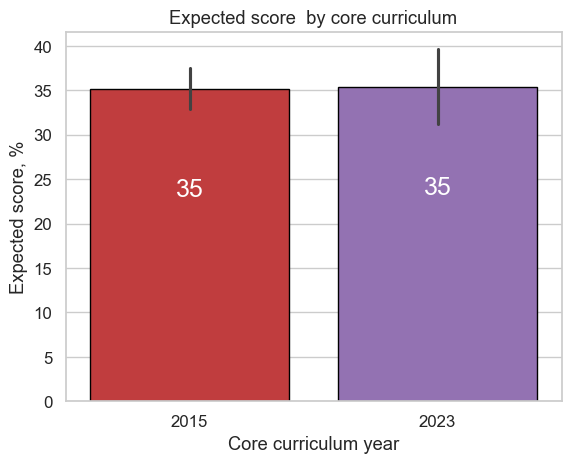

In [18]:
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.1)

mean_exp_perc = perc_data.reset_index()
mean_exp_perc[["school_type", "req_year"]] = mean_exp_perc["req_year-type"].str.split(" based ", n=1, expand=True)

palette = {
    "2015": "tab:red",
    "2023": "tab:purple"
}

ax = sns.barplot(data=mean_exp_perc, x="req_year", y="exam_exp_perc", hue="req_year", palette=palette, edgecolor="black")
for p in ax.patches:
    ax.annotate(f'\n{int(p.get_height())}', (p.get_x() + 0.4, p.get_height() - 0.2 * p.get_height()), ha='center', va='top', color='white', size=18)

ax.set(xlabel="Core curriculum year",
       ylabel="Expected score, %",
      title="Expected score  by core curriculum")

mean_exp_perc.to_csv("Data/mean_exp_perc.csv")

plt.show()

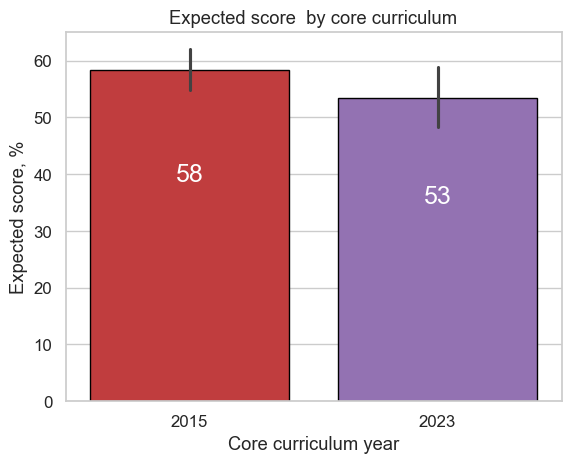

In [19]:
mean_max_perc = exams_grouped.reset_index()
mean_max_perc[["school_type", "req_year"]] = mean_max_perc["req_year-type"].str.split(" based ", n=1, expand=True)

sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.1)

palette = {
    "2015": "tab:red",
    "2023": "tab:purple"
}

ax = sns.barplot(data=mean_max_perc, x="req_year", y="top_points", hue="req_year", palette=palette, edgecolor="black")
for p in ax.patches:
    ax.annotate(f'\n{int(p.get_height())}', (p.get_x() + 0.4, p.get_height() - 0.2 * p.get_height()), ha='center', va='top', color='white', size=18)

ax.set(xlabel="Core curriculum year",
       ylabel="Expected score, %",
      title="Expected score  by core curriculum")

mean_max_perc.to_csv("Data/mean_max_perc.csv")

plt.show()

In [20]:
ppts_2015 = pd.concat([pd.read_csv(f"primary_{year}_tpoints.csv") for year in range(2015, 2021)])
ppts_2023 = pd.concat([pd.read_csv("primary_2023_tpoints.csv"),
                      pd.read_csv("primary_2024_tpoints.csv"),
                      pd.read_csv("additional_2023_tpoints.csv"),
                      pd.read_csv("additional_2024_tpoints.csv"),
                      pd.read_csv("make-up_2024_tpoints.csv")])

In [21]:
total_ppts = pd.concat([ppts_2015, ppts_2023])

cat_2015=[]

for pts in ppts_2015["points"].values:
    if pts == 1:
        cat_2015.append("1")
    elif pts == 2:
        cat_2015.append("2")
    else:
        cat_2015.append("3+")

cat_2023=[]

for pts in ppts_2023["points"].values:
    if pts == 1:
        cat_2023.append("1")
    elif pts == 2:
        cat_2023.append("2")
    else:
        cat_2023.append("3+")

ppts_2015_gp = pd.DataFrame(columns=["pt_cat"])

ppts_2015["cat"] = cat_2015
ppts_2015_gp["pt_cat"] = ppts_2015.groupby(["req_year", "cat"])["points"].sum()
ppts_2015_gp["pt_cat"] = round(ppts_2015_gp["pt_cat"] /  3, 1)

ppts_2023_gp = pd.DataFrame(columns=["pt_cat"])

ppts_2023["cat"] = cat_2023
ppts_2023_gp["pt_cat"] = ppts_2023.groupby(["req_year", "cat"])["points"].sum()
ppts_2023_gp["pt_cat"] = round(ppts_2023_gp["pt_cat"] /  2.3, 1)

all_ppts = pd.concat([ppts_2015_gp, ppts_2023_gp])

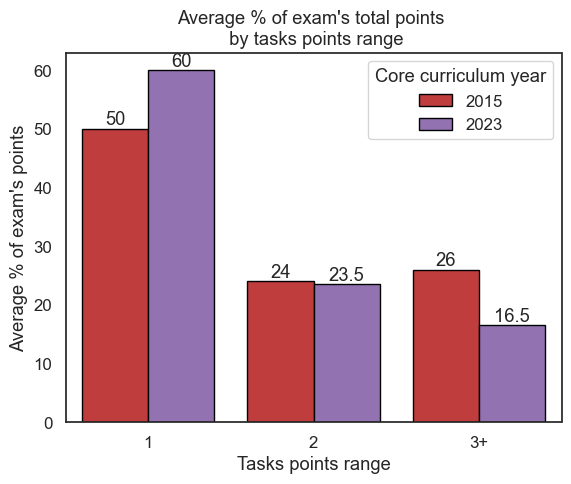

In [22]:


palette = {
    2015: "tab:red",
    2023: "tab:purple"
}

sns.set_style("white")
sns.set_context("notebook", font_scale=1.1)

g = sns.barplot(data=all_ppts, x="cat", y="pt_cat", hue="req_year", palette=palette, edgecolor="black")
g.set(xlabel="Tasks points range", ylabel="Average % of exam's points")
for i in g.containers:
    g.bar_label(i,)
    
g.set(title="Average % of exam's total points \n by tasks points range")
plt.legend(title="Core curriculum year")

all_ppts.to_csv("Data/all_ppts.csv")

plt.show()